In [75]:
import nltk
import gensim
import numpy as np
import os
import json

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

### Helper function to convert raw text to word ids representation

In [76]:
def convert_text_to_word_ids(raw_text):
    d = gensim.corpora.Dictionary()
    
    if os.path.exists('./data/corpora.txt'):
        d.load_from_text('./data/corpora.txt')
    
    sents = nltk.tokenize.sent_tokenize(raw_text)
    
    res = list()
    
    for s in sents:
        words = nltk.tokenize.wordpunct_tokenize(s)
        tmp = d.doc2bow(words, allow_update=True)
        tmp.append( (-1, 1) ) # -1 here is end of sequence meta id
        ids = [t[0] for t in tmp]
        res.append(ids)

    d.save_as_text('./data/corpora.txt')
    
    return res

In [82]:
def get_sentence_lengths(ids_text):
    l = []    
    for s in ids_text:
        l.append(len(s)-1)
    return np.array(l)

### For each file in raw_texts folder get a word ids representation and build a carpora

In [15]:
files = os.listdir('./raw_texts/')

Processing: wonderland.txt
Sentencies: 977
Mean: 27.8
Deviation: 19.2


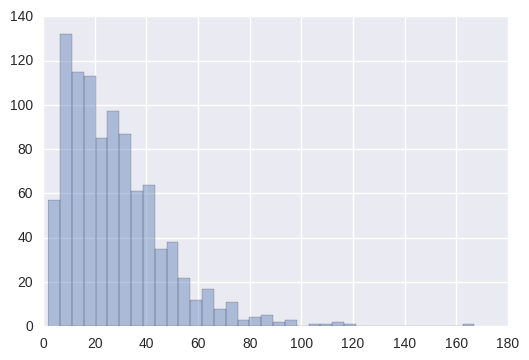

Processing: nietzsche.txt
Sentencies: 3163
Mean: 28.7
Deviation: 22.9


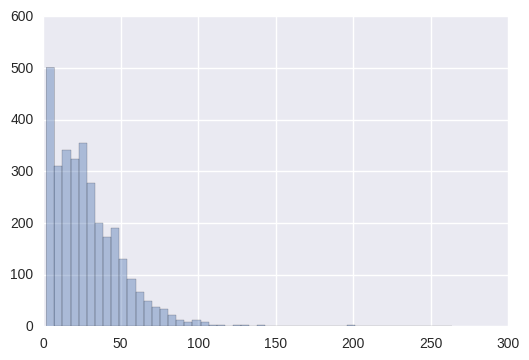

In [88]:
for f in files:
    print('Processing: ' + f)
    raw_text = open('./raw_texts/' + f).read()
    r = convert_text_to_word_ids(raw_text)
    d = get_sentence_lengths(r)
    print('Sentencies: {}'.format(len(r)))
    print('Mean: %.1f'%(np.mean(d)))
    print('Deviation: %.1f'%(np.std(d)))
    json_file = open('./data/' + f + '.json', 'w')
    json.dump(r, json_file)
    seaborn.distplot(d, kde=False)
    plt.show()

### Corpora info

In [91]:
d = gensim.corpora.Dictionary().load_from_text('./data/corpora.txt')

In [97]:
print('Number of words in corpora: %d'%(len(d)))

Number of words in corpora: 11661
